Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


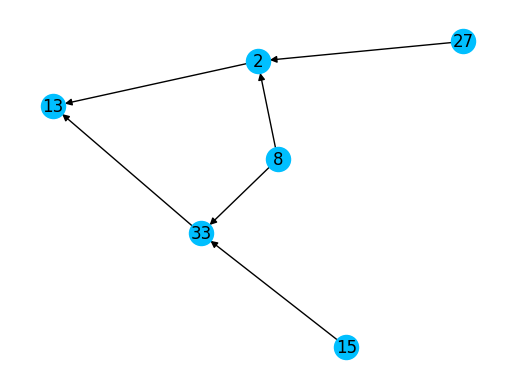

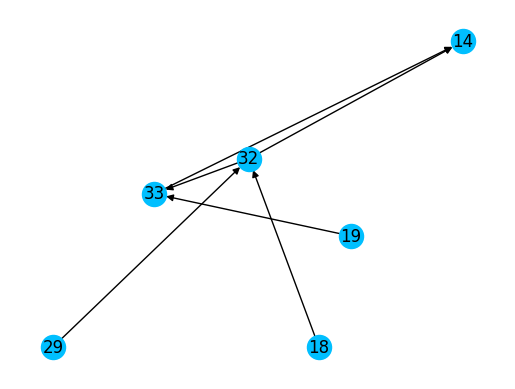

In [18]:
import torch
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.loader import NeighborLoader

def draw(graph):
    nids = graph.n_id
    graph = to_networkx(graph)
    for i, nid in enumerate(nids):
        graph.nodes[i]['txt'] = str(nid.item())
    node_labels = nx.get_node_attributes(graph, 'txt')
    nx.draw_networkx(graph, labels=node_labels, node_color = '#00BFFF')
    plt.axis('off')
    plt.show()

dataset = KarateClub()
g = dataset[0]
print(g)
g.n_id = torch.arange(g.num_nodes)


# num_neighbors=[2,2] denotes sampling 2 layers, with each node in each layer sampling up to 2 neighbors
# input_nodes denotes original sampling points
for s in NeighborLoader(g, num_neighbors=[2,2], input_nodes=torch.Tensor([13,14])):
    draw(s)


In [19]:
print(s.n_id)
s.n_id2 = torch.arange(s.num_nodes)
print(s.n_id2)

tensor([14, 33, 32, 19, 29, 18])
tensor([0, 1, 2, 3, 4, 5])
